# Atelier théorique #9 - **Évaluation d'algorithmes**

### Objectifs de cette leçon
1. Se familiariser avec les métriques d'évaluation utilisés dans les problèmes de classification et de régression.
2. Apprendre à interpréter les métriques d'évaluation.
3. Être en mesure de sélectionner le bon métrique d'évaluation en fonction de la problématique et de l'algorithme.

### Étapes
Chaque bloc de code est construit selon la même logique.
1. Création d'un modèle à l'aide d'un algorithme.
  * Un algorithme de régression logistique est utilisé pour la classification.
  * Un algorithme de régression linéaire est utilisé pour la régression.
2. Application d'une validation croisée de 10 itérations.
3. Évaluation du modèle avec un métrique.

### Charger les données et ajouter les titres de colonnes

## 1. Classification

1. Précision de classification
2. Matrice de confusion
3. Rapport de classification
4. Aire sous la courbe ROC


### Importer le jeu de données Diabiètes pour la classification

In [ ]:
# Importer la librairie pandas
import pandas as pd

# Télécharger le jeu de données
data = pd.read_csv('diabetes.csv')

# Remplacer le nom des colonnes
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data.columns = colnames

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Séparer les données en sous-ensemble X et y

In [ ]:
# Préparation des données
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [ ]:
# Imprimer l'aperçu des colonnes incluses dans X
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# Imprimer les colonnes incluses dans y
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

## 1.1 Précision de classification

> Définir l'argument `scoring='accuracy'` dans la fonction `cross_val_score`
.

In [ ]:
# Importer les librairies
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Définir le modèle à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"Précision : {round(cv_scores.mean()*100.0, 2)}% +/- {round(cv_scores.std()*100.0, 2)}%")

Précision : 77.35% +/- 3.57%


### 1.2 Matrice de confusion

In [ ]:
# Importer les librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
# Séparer le jeu de données en sous-ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[89 11]
 [18 36]]


#### Bonus - Visualiser la matrice de confusion

En utilisant les librairies matplotlib et seaborn, il est possible d'obtenir un aperçu plus esthétique et descriptif de l'information contenue dans une matrice de confusion.

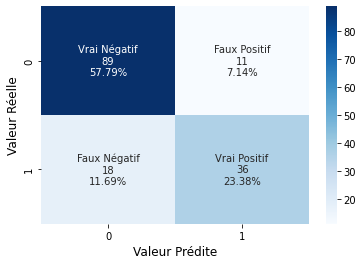

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

group_names = ['Vrai Négatif','Faux Positif','Faux Négatif','Vrai Positif']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Valeur Prédite', size=12)
plt.ylabel('Valeur Réelle', size=12)
plt.show()

In [ ]:
labels

array([['Vrai Négatif\n89\n57.79%', 'Faux Positif\n11\n7.14%'],
       ['Faux Négatif\n18\n11.69%', 'Vrai Positif\n36\n23.38%']],
      dtype='<U22')

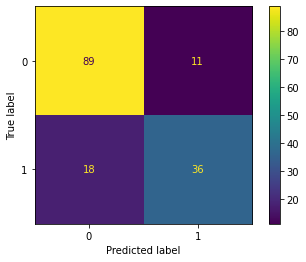

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=lr_model.classes_)
disp.plot()
plt.show()

# 1.3 Rapport de classification

In [ ]:
# Importer les librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Séparer le jeu de données en sous-ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.77      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



### 1.4 Aire sous la courbe ROC

> Définir l'argument `scoring='roc_auc'` dans la fonction `cross_val_score`

In [ ]:
# Importer les librairies
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

In [ ]:
# Définir le modèle à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='roc_auc')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"Précision : {round(cv_scores.mean(), 3)} +/- {round(cv_scores.std(), 3)}")

Précision : 0.829 +/- 0.037


#### Bonus : Graphique de l'aire sous la courbe ROC

In [ ]:
# Séparer le jeu de données en sous-ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

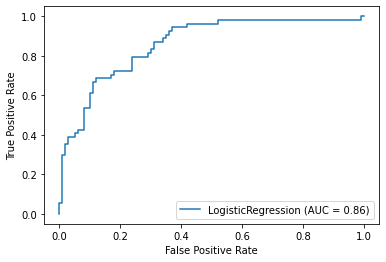

In [ ]:
plot_roc_curve(lr_model, X_test, y_test) 
plt.show()

## 2. Régression

1. Erreur moyenne absolue (MAE)
2. Erreur quadratique moyenne (MSE)
3. R carré (R2)

## NOUVEAU JEU DE DONNÉES

### Importer et charger le jeu de données
Dans les exemples impliquant des problèmes de régression, nous allons utiliser le jeu de données `energy_efficiency.csv` comme exemple.

In [ ]:
# Importer la librairie pandas
import pandas as pd

# Télécharger le jeu de données
data2 = pd.read_csv('energy_efficiency.csv')

# Observer le jeu de données brute
data2.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area _distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Remplacer le nom des colonnes
colnames = ['compact', 'surface', 'wall', 'roof', 'height', 'orient', 'glazing', 'glazing_dist', 'heating', 'cooling']
data2.columns = colnames

# Observer le jeu de données avec les nouvelles colonnes
data2.head()

,compact,surface,wall,roof,height,orient,glazing,glazing_dist,heating,cooling
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Explorer le jeu de données sommairement

In [ ]:
data2.dtypes

compact         float64
surface         float64
wall            float64
roof            float64
height          float64
orient            int64
glazing         float64
glazing_dist      int64
heating         float64
cooling         float64
dtype: object

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   compact       768 non-null    float64
 1   surface       768 non-null    float64
 2   wall          768 non-null    float64
 3   roof          768 non-null    float64
 4   height        768 non-null    float64
 5   orient        768 non-null    int64  
 6   glazing       768 non-null    float64
 7   glazing_dist  768 non-null    int64  
 8   heating       768 non-null    float64
 9   cooling       768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Séparer les données en sous-ensemble X et y

Attention! On a 2 variables cibles ici, `heating` et `cooling`.

Pour les explications, nous allons utiliser `heating` seulement.

In [ ]:
# Préparation des données
X = data2.iloc[:, 0:8]
y = data2.iloc[:, 8]

NameError: ignored

In [ ]:
# Imprimer l'aperçu des colonnes incluses dans X
X.head()

,compact,surface,wall,roof,height,orient,glazing,glazing_dist
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
# Imprimer les colonnes incluses dans y
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: heating, dtype: float64

### 2.1 Erreur moyenne absolue (MAE)

> Définir l'argument `scoring='neg_mean_absolute_error'` dans la fonction `cross_val_score`

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Définir le modèle à utiliser
lr_model = LinearRegression()

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_absolute_error')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"MAE : {abs(round(cv_scores.mean(), 3))} +/- {round(cv_scores.std(), 3)}")

MAE : 2.247 +/- 0.629


### 2.2 Erreur quadratique moyenne (MSE)

> Définir l'argument `scoring='neg_mean_squared_error'` dans la fonction `cross_val_score`

In [ ]:
# Définir le modèle à utiliser
lr_model = LinearRegression()

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"MSE : {abs(round(cv_scores.mean(), 3))} +/- {round(cv_scores.std(), 3)}")

MSE : 9.933 +/- 5.685


In [ ]:
# Calculer le RMSE
from math import sqrt
print(f'RMSE : {round(sqrt(abs(cv_scores.mean())), 3)}')

RMSE : 3.152


### 2.3 R carré (R2)

> Définir l'argument `scoring='r2'` dans la fonction `cross_val_score`

In [ ]:
# Définir le modèle à utiliser
lr_model = LinearRegression()

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='r2')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"R-Squared : {round(cv_scores.mean(), 3)} +/- {round(cv_scores.std(), 3)}")

R-Squared : 0.893 +/- 0.065


## **LEÇON #9 - EXERCICE CONTINU**

## Évaluation d'algorithmes

> *Utiliser votre notebook individuel `notebook_pratique_classification_binaire.ipynb` pour les exercices concernant la classification.*

> *Utiliser votre notebook individuel `notebook_pratique_régression.ipynb` pour les exercices concernant la régression.*

### Description
En utilisant les notebooks pratiques ci-dessus, accomplir les tâches énumérées ci-dessous.

> **Répondre aux questions dans une cellule de texte Markdown au fur et à mesure que vous progressez.**

> **Refaites rouler le code en entier avant de commencer cet exercice.** Utiliser le menu Exécution/Tout exécuter pour y parvenir.

## Tâches à accomplir :

### Classification
En utilisant le jeu de données banknote `banknote.csv` et une régression logistique `LogisticRegression`...

1. Évaluer l'algorithme en utilisant le métrique de précision (accuracy).
  * 1.1 Quelle est la précision du modèle?
2. Produire la matrice de confusion sous forme de figure.
  * 2.1 Combien y a-t-il de faux négatifs?
  * 2.2 Que cela signifie-t-il en mot? Écrire la réponse en une phrase.
3. Produire le rapport de classification.
  * 3.1 Quel est le score F1?
4. Obtenir l'aire sous la courbe ROC.
  * 4.1 Faire le graphique de la courbe ROC.
  * 4.2 Quelle est la valeur de l'aire sous la courbe ROC? Que cela signifie-t-il?

### Régression 
En utilisant le jeu de données concrete `concrete.csv` et une régression linéaire `LinearRegression`...
1. Évaluer l'algorithme avec l'erreur absolue moyenne (MAE).
2. Évaluer l'algorithme avec l'erreur quadratique moyenne (MSE) et calculer la racine carrée de l'erreur quadratique moyenne (RMSE).
3. Évaluer l'algorithme avec le R-carré (R2).